## HW1-Perceptron 
Written by Matt Kaiser
Worked with Alex Bozanic

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Now We Read in the test data via Pandas

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()
# Print the last five lines. 
# First feat column = sepal length
# Third feat column = petal length

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Time for the plots

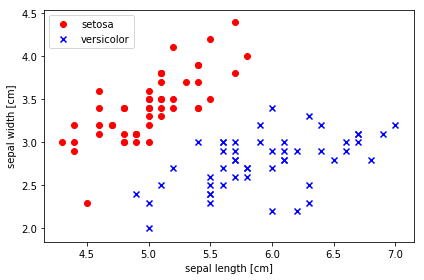

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and sepal width
X = df.iloc[0:100, [0, 1]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]') #CHANGED FROM PETAL LENGTH TO SEPAL WIDTH
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./images/02_06.png', dpi=300)
plt.show()

# Delieverable #1
Comparing 10 to 1000 iterations

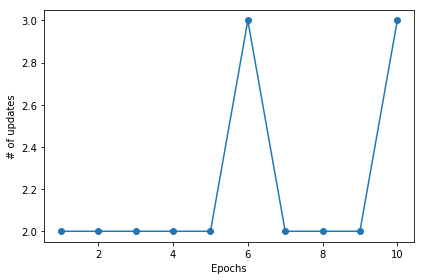

Weights after 1000 iterations: [-0.4   1.68 -1.66] ,I did this for fun to see how different it would be


In [16]:
#10 iterations
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of updates')

plt.tight_layout()

plt.show()
print ("Weights after 1000 iterations:" , ppn.w_ , ",I did this for fun to see how different it would be")

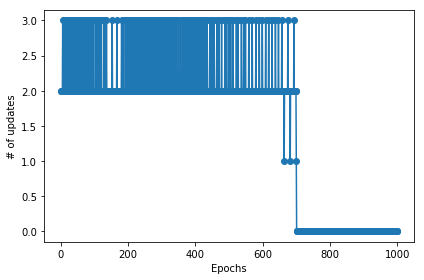

Weights after 1000 iterations: [-24.8   15.8  -20.14] which are the coefficents that make our final linear function


In [20]:
#1000 iterations, what we will be using for 


ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('# of updates')

plt.tight_layout()

plt.show()
print ("Weights after 1000 iterations:" , ppn.w_, "which are the coefficents that make our final linear function ofr the third delieverable")

# Plotting for Decision Tree

In [6]:
from matplotlib.colors import ListedColormap


def pdr(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    #assigned colors
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# Delievereable 2

Time to examine the figure of decision regions (the figure with two regions shaded as red or blue) when
running perceptron for 10, 20, 50, 100, 200, 500, and 1000 iterations

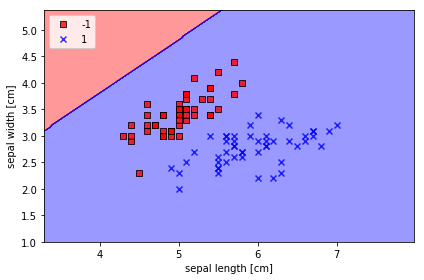

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
pdr(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

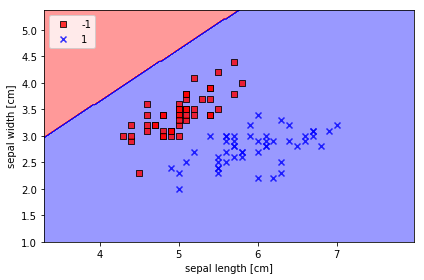

In [8]:
ppn = Perceptron(eta=0.1, n_iter=20)
ppn.fit(X, y)
pdr(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

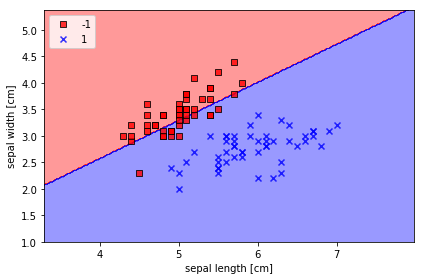

In [9]:
ppn = Perceptron(eta=0.1, n_iter=50)
ppn.fit(X, y)
pdr(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

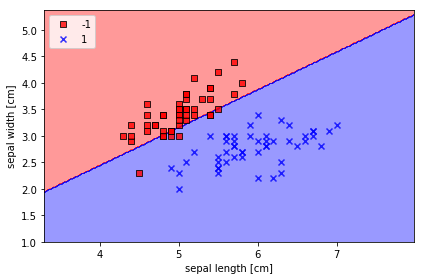

In [10]:
ppn = Perceptron(eta=0.1, n_iter=100)
ppn.fit(X, y)
pdr(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

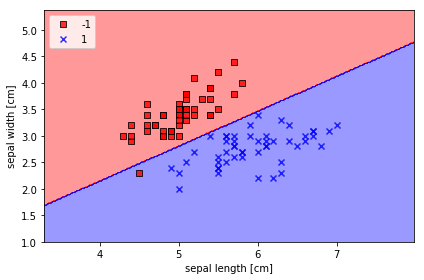

In [11]:
ppn = Perceptron(eta=0.1, n_iter=200)
ppn.fit(X, y)
pdr(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

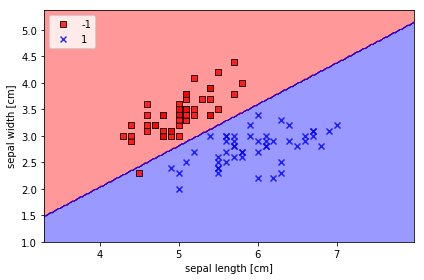

In [12]:
ppn = Perceptron(eta=0.1, n_iter=500)
ppn.fit(X, y)
pdr(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

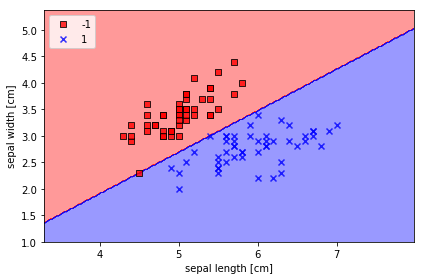

In [13]:
ppn = Perceptron(eta=0.1, n_iter=1000)
ppn.fit(X, y)
pdr(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Delieverable 3


Write the linear function that is learned, in the form m1x1 + m2x2 + b, based on the
parameters in the w vector.

I will be using the coefficents from the 1000 iterations run.

Linear function = 15.8x<sub>1</sub> - 20.14x<sub>2</sub> - 24.8